<a href="https://colab.research.google.com/github/JesseJames50/Analise-Dados-Financeiros/blob/main/analise_risco_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#Importando as Bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [12]:
# Carregando os dados
data = pd.read_csv('/content/GermanCredit.csv')
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0


In [13]:
#Verificando os dados
data.describe()

,duration,amount,installment_rate,present_residence,age,number_credits,people_liable,credit_risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [14]:
# Pré-processamento dos dados
# Convertendo variáveis categóricas em numéricas
label_encoders = {col: LabelEncoder() for col in data.columns if data[col].dtype == 'object'}
for col, le in label_encoders.items():
    data[col] = le.fit_transform(data[col])

In [15]:
# Escalonando os dados numéricos
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [16]:
# Separando os dados em características (X) e o alvo (y)
X = data.drop('credit_risk', axis=1)
y = data['credit_risk'].astype(int)  # Garantindo que o alvo é inteiro

In [17]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Criando e treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
# Fazendo previsões no conjunto de teste
y_pred = knn.predict(X_test)

In [20]:
# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [21]:
# Resultados da avaliação
print(f"Acurácia: {accuracy}")
print("Relatório de Classificação:")
print(classification_rep)

Acurácia: 0.6966666666666667
Relatório de Classificação:
              precision    recall  f1-score   support

          -1       0.50      0.25      0.34        91
           0       0.73      0.89      0.80       209

    accuracy                           0.70       300
   macro avg       0.62      0.57      0.57       300
weighted avg       0.66      0.70      0.66       300



# Análise de Importância dos Recursos na seleção das variáveis

 ## Usando Random Forest para Importância de Recursos

In [30]:
# Usando Random Forest para Importância de Recursos
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Supondo que você já tem X_train, y_train, X_test, y_test definidos

# Criando o modelo Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Fazendo previsões e avaliando o modelo
y_pred = forest.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))

# Obtendo a importância dos recursos
importances = forest.feature_importances_
feature_names = X_train.columns

# Exibindo a importância de cada recurso
feature_importances = pd.DataFrame(sorted(zip(importances, feature_names)), columns=['Importância', 'Recurso']).set_index('Recurso')
print(feature_importances.sort_values(by='Importância', ascending=False))


Acurácia: 0.7466666666666667
                         Importância
Recurso                             
amount                      0.133224
age                         0.114499
duration                    0.106004
status                      0.100372
purpose                     0.073097
credit_history              0.062785
employment_duration         0.050988
installment_rate            0.042798
present_residence           0.042764
property                    0.042472
savings                     0.040855
job                         0.033000
personal_status_sex         0.032064
housing                     0.026538
other_installment_plans     0.024489
number_credits              0.022095
telephone                   0.020328
other_debtors               0.015176
people_liable               0.011942
foreign_worker              0.004511


 ## Usando Correlação para Importância de Recursos

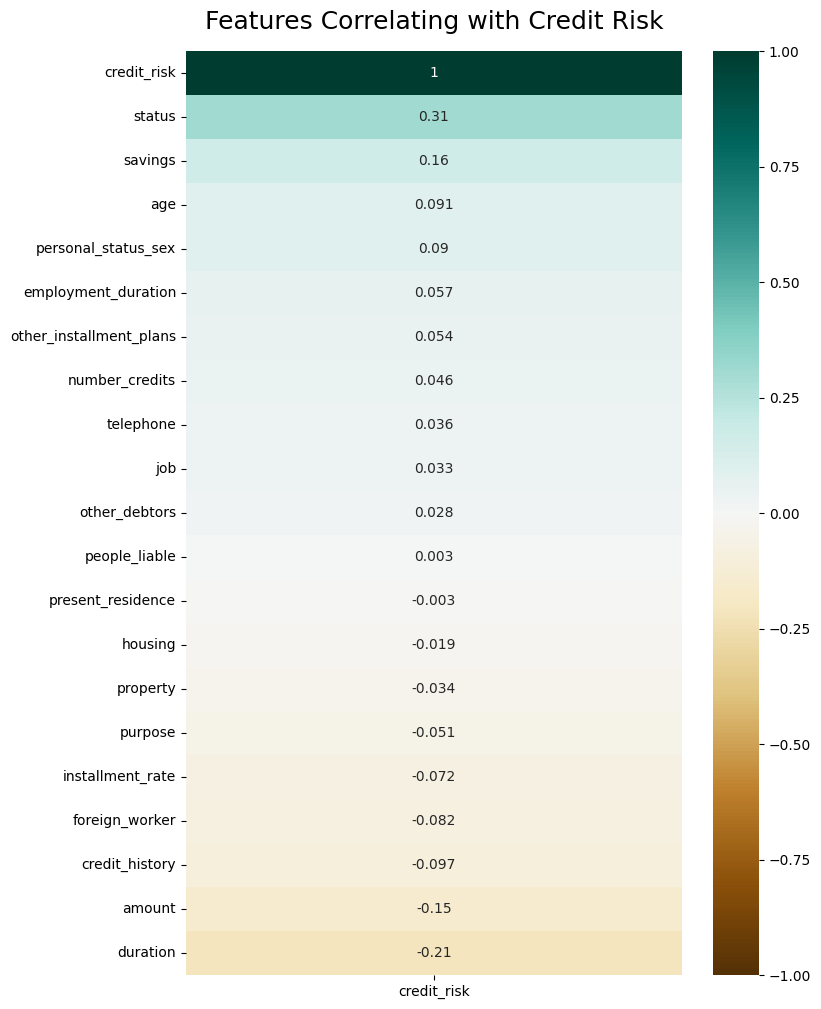

In [31]:
# Usando Correlação para Importância de Recursos
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando a matriz de correlação
correlation_matrix = data.corr()

# Extraindo a correlação em relação à variável alvo
target_correlation = correlation_matrix['credit_risk'].sort_values(ascending=False)

# Plotando as correlações com a variável alvo
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(correlation_matrix[['credit_risk']].sort_values(by='credit_risk', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Credit Risk', fontdict={'fontsize':18}, pad=16);
plt.show()
